In [ ]:
#Q.No.1> Perform basic color-based segmentation to separate the blue color in an image.
import cv2
import numpy as np

# Load the image
image = cv2.imread('image_with_boxes.jpg')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for blue color in HSV
# These values can be adjusted based on the exact shade of blue
lower_blue = np.array([100, 150, 50])  # Lower bound of blue
upper_blue = np.array([140, 255, 255])  # Upper bound of blue

# Create a mask that identifies all pixels within the blue range
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Bitwise AND the mask with the original image to isolate blue areas
blue_segmented = cv2.bitwise_and(image, image, mask=mask)

# Display the original and segmented images
cv2.imshow('Original Image', image)
cv2.imshow('Blue Segmented Image', blue_segmented)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Q.No.2>  Use edge detection with Canny to highlight object edges in an image loaded.
import cv2
import numpy as np


image = cv2.imread('image_with_boxes.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred_image, 100, 200)  # Thresholds can be adjusted

# Display the original and edge-detected images
cv2.imshow('Original Image', image)
cv2.imshow('Canny Edge Detection', edges)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Q.No.3> Load a pretrained Mask R-CNN model from PyTorch and use it for object detection and segmentation on an image.
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt


model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image_path = 'image_with_boxes.jpg'
image = cv2.imread(image_path)  # Read the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
image_tensor = F.to_tensor(image_rgb).unsqueeze(0)  # Convert to tensor and add batch dimension

# Perform inference (object detection and segmentation)
with torch.no_grad():  # Disable gradient calculation for inference
    predictions = model(image_tensor)

# Extract predictions (bounding boxes, masks, and labels)
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()
masks = predictions[0]['masks'].cpu().numpy()

# Set a threshold for detection confidence
threshold = 0.5
filtered_boxes = boxes[scores > threshold]
filtered_labels = labels[scores > threshold]
filtered_masks = masks[scores > threshold]

# Draw bounding boxes and masks on the image
for i in range(len(filtered_boxes)):
    box = filtered_boxes[i]
    label = filtered_labels[i]
    mask = filtered_masks[i, 0]  # The mask is a single channel

    # Draw the bounding box
    cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    
    # Overlay the mask on the image (for visualization)
    mask = mask > 0.5  # Convert the mask to binary
    image[mask] = image[mask] * 0.7 + np.array([0, 255, 0]) * 0.3  # Apply the mask with transparency

# Convert the image back to BGR for display in OpenCV
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Display the image with bounding boxes and masks
cv2.imshow('Mask R-CNN Object Detection and Segmentation', image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Q.No.4> Generate bounding boxes for each object detected by Mask R-CNN in an image.
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image_path = 'image_with_boxes.jpg'  # Replace with your image path
image = cv2.imread(image_path)  # Read the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
image_tensor = F.to_tensor(image_rgb).unsqueeze(0)  # Convert to tensor and add batch dimension

# Perform inference (object detection)
with torch.no_grad():  # Disable gradient calculation for inference
    predictions = model(image_tensor)

# Extract bounding boxes and their associated scores
boxes = predictions[0]['boxes'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

# Set a threshold for detection confidence
threshold = 0.5
filtered_boxes = boxes[scores > threshold]

# Draw bounding boxes on the image
for box in filtered_boxes:
    x1, y1, x2, y2 = box
    # Draw the bounding box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Convert the image back to BGR for display in OpenCV
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Display the image with bounding boxes
cv2.imshow('Mask R-CNN Object Detection', image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Q.No.5> Convert an image to grayscale and apply Otsu's thresholding method for segmentation.
import cv2
import numpy as np

# Load the image
image_path = 'image_with_boxes.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
# The second parameter is 0 because we want Otsu's method to automatically determine the optimal threshold
ret, otsu_thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
cv2.imshow('Original Image', image)
cv2.imshow("Otsu's Thresholding", otsu_thresholded)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Q.No.6> Perform contour detection in an image to detect distinct objects or shapes.

import cv2
import numpy as np

# Load the image
image_path = 'image_with_boxes.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise (optional)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detection to find edges
edges = cv2.Canny(blurred_image, 100, 200)

# Find contours from the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contoured_image = image.copy()
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green

# Display the original and contoured images
cv2.imshow('Original Image', image)
cv2.imshow('Contours Detected', contoured_image)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Q.No.7> Apply Mask R-CNN to detect objects and their segmentation masks in a custom image and display them.
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image_path = 'image_with_boxes.jpg'  # Replace with your image path
image = cv2.imread(image_path)  # Read the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
image_tensor = F.to_tensor(image_rgb).unsqueeze(0)  # Convert to tensor and add batch dimension

# Perform inference (object detection and segmentation)
with torch.no_grad():  # Disable gradient calculation for inference
    predictions = model(image_tensor)

# Extract predictions (bounding boxes, masks, and labels)
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()
masks = predictions[0]['masks'].cpu().numpy()

# Set a threshold for detection confidence
threshold = 0.5
filtered_boxes = boxes[scores > threshold]
filtered_labels = labels[scores > threshold]
filtered_masks = masks[scores > threshold]

# Draw bounding boxes and masks on the image
for i in range(len(filtered_boxes)):
    box = filtered_boxes[i]
    label = filtered_labels[i]
    mask = filtered_masks[i, 0]  # The mask is a single channel

    # Draw the bounding box
    cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    
    # Overlay the mask on the image (for visualization)
    mask = mask > 0.5  # Convert the mask to binary
    image[mask] = image[mask] * 0.7 + np.array([0, 255, 0]) * 0.3  # Apply the mask with transparency

# Convert the image back to BGR for display in OpenCV
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Display the image with bounding boxes and masks
cv2.imshow('Mask R-CNN Object Detection and Segmentation', image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_25244\1570509223.py:8: SyntaxWarning: invalid escape sequence '\D'
  image_path = 'D:\Document\DeepLearning_Assignment\Image4.jpg'  # Replace with your image path


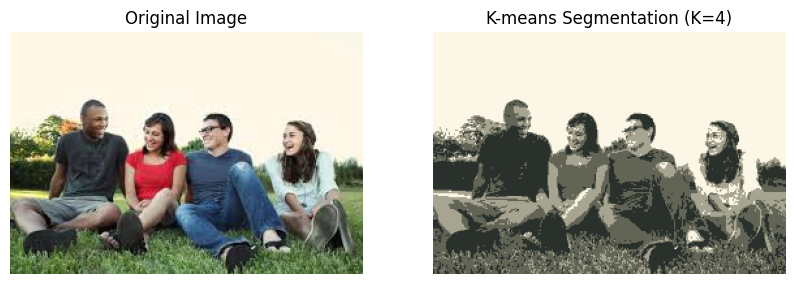

In [1]:
#Q.No.8> Apply k-means clustering for segmenting regions in an image.
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image_path = 'D:\Document\DeepLearning_Assignment\Image4.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Reshape the image into a 2D array of pixels
pixels = image_rgb.reshape(-1, 3)

# Apply K-means clustering
K = 4  # Number of clusters (regions)
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(pixels)

# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Reconstruct the segmented image using the centroids
segmented_image = centroids[labels].reshape(image_rgb.shape).astype(np.uint8)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"K-means Segmentation (K={K})")
plt.axis('off')

plt.show()